<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
fileDownloaded = drive.CreateFile({'id': '1SeCA5QgNFm0GALA_yC8jLnbIgsyilfJz'})
fileDownloaded.GetContentFile('figure1.csv')

In [ ]:
df = pd.read_csv('figure1.csv',encoding = "cp932")
df.head()

,期間,株式コード,日経会社コード,上場コード,銘柄名称,時価総額（発行済み株式数ベース）
0,1985,1301,1,11.0,極洋,2.639471e+10
1,1985,1331,2,11.0,マルハニチロ食品,2.631872e+10
2,1985,1332,3,11.0,日本水産,8.350418e+10
3,1985,1333,4,11.0,マルハニチロ,8.040000e+10
4,1985,1334,30854,NaN,マルハニチロホールディングス,NaN


In [ ]:
df = df.rename(columns={'期間':'Year'})
df = df.rename(columns={'株式コード':'Stock code'})
df = df.rename(columns={'日経会社コード':'gvkey'})
df = df.rename(columns={'上場コード':'Listing code'})
df = df.rename(columns={'時価総額（発行済み株式数ベース）':'Aggregate market capitalization'})

In [ ]:
Agdata = df.groupby(['Year'],as_index=False)[['Aggregate market capitalization']].mean()
Nmdata = df.groupby(['Year'])[['Listing code']].count()

Text(0.5, 1.0, 'Figure 1')

<Figure size 432x288 with 0 Axes>

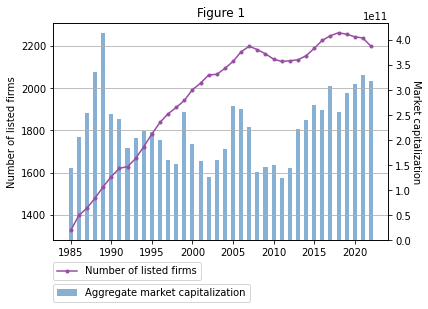

In [ ]:
x = Agdata['Year']
y = Agdata['Aggregate market capitalization']
fig = plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Nmdata,marker=".",color=cm.Set1.colors[3],label="Number of listed firms")
ax2.bar(x,y,alpha=0.6,width=0.5,color=cm.Set1.colors[1], label="Aggregate market capitalization")
ax1.patch.set_alpha(0)
ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.grid(axis='y')
ax1.legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
ax2.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10)
ax1.set_ylabel('Number of listed firms')
ax2.set_ylabel('Market capitalization',labelpad=10,rotation=270)
plt.title('Figure 1')